C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22212\3108691806.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


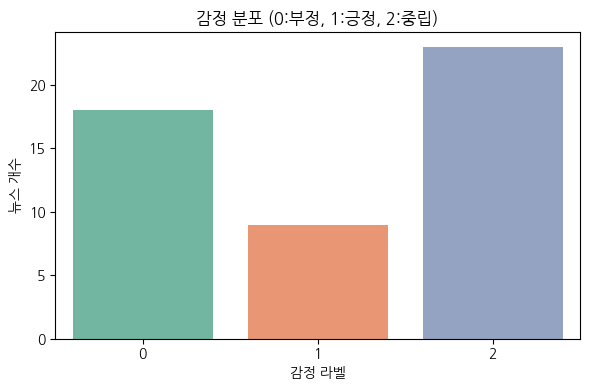

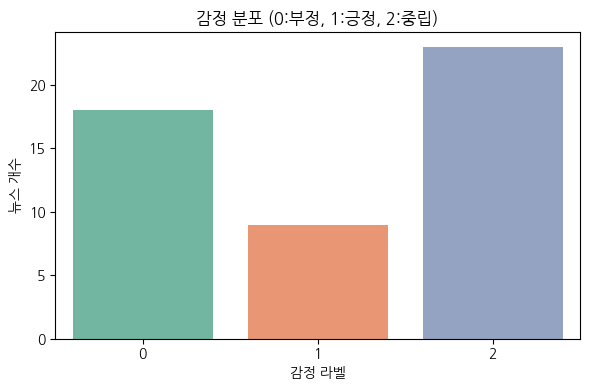

In [6]:
# 📁 04_prediction_visualization.ipynb
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm

DATA_PATH = "../data/preprocessed_labeled.csv"
FONT_PATH = "../data/NanumGothic.ttf"
SAVE_DIR = "../data"

assert os.path.exists(DATA_PATH), f"❌ 데이터 파일 없음: {DATA_PATH}"
assert os.path.exists(FONT_PATH), f"❌ 폰트 파일 없음: {FONT_PATH}"

font_name = fm.FontProperties(fname=FONT_PATH).get_name()
plt.rc("font", family=font_name)

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["clean_title", "label"])

plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df, palette="Set2")
plt.title("감정 분포 (0:부정, 1:긍정, 2:중립)")
plt.xlabel("감정 라벨")
plt.ylabel("뉴스 개수")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "sentiment_distribution.png"))
plt.show()

positive_text = " ".join(df[df["label"] == 1]["clean_title"])

if positive_text.strip():
    wc = WordCloud(
        font_path=FONT_PATH,
        background_color="white",
        width=800,
        height=500
    ).generate(positive_text)

    plt.figure(figsize=(6, 4))
    sns.countplot(x="label", hue="label", data=df, palette="Set2", legend=False)
    plt.title("감정 분포 (0:부정, 1:긍정, 2:중립)")
    plt.xlabel("감정 라벨")
    plt.ylabel("뉴스 개수")
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, "sentiment_distribution.png"))
    plt.show()

else:
    print("⚠️ 긍정 뉴스가 없어 워드클라우드를 생성할 수 없습니다.")
